# CM1 "Heart disease" dataset

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Starting with "Heart disease" dataset

In [4]:
df = pd.read_csv('heart_disease_missing.csv')
print(df.shape)
number_of_rows, _ = df.shape
df.head(20)

(212, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.035667,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.060892,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,0.931512,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.042729,0


#**Deciding on the type of data filling**

We don't know that which vlaues here are missing! The types are different between columns, it is good to know that which values from what kind of types are missing for filling or decide about them.

For instance, if we know that the values are missed from sex (binary type) we can't replace it with mean because it has no meaning. However, it makes sense for the numeric values (eg. age).

In [5]:
print("Reference is from here: {}".format("https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd"))
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Reference is from here: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index([], dtype='object')


Till now we know that all the values are objects.

In [6]:
sums = df.loc[:,list(num_vars)].isnull().sum() 
binary_sums = sums > 0
print("Number of missed values: {} which is {} of data".format(sums.sum(), (sums.sum() / number_of_rows).round(2)))
print("Description: \n{}".format(sums[binary_sums]))

Number of missed values: 41 which is 0.19 of data
Description: 
trestbps     7
chol        10
restecg      5
thalach      4
oldpeak     12
slope        2
thal         1
dtype: int64


So, as you see these are the number of missed values from this dataset.

**The numeric type missed values:**

trestbps, chol, thalach, oldpeak

**The categorical values:**

slope, thal, restecg

For the numeric types we can use many types of replacing with guessing.

However, for the categorical values many of guessing types can't be used (eg. mean, mode, interpolations, smoothing, etc.). 

# Filling categorical type values

there are only 8 out of 202 samples that miss such values (~ 4%). So dropping these values would be the best and less impactful option (less impactful than guessing them).

In [7]:
df_drcat = df.dropna(subset=["thal", "slope", "restecg"])
df_drcat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,NaN,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,0.983927,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,NaN,2.0,1,1.884149,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,2.970521,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,1.879487,1


I see that thal is not categorical, however it is still one data point missing thal; so, just leave it dropped. It won't have that much of effect on the performance.

In [8]:
df[df["target"] > 0]["thal"].mean()

2.145448215734704

In [9]:
df[df["target"] == 0 ]["thal"].mean()

2.588468500073356

If there were considerable amount of categorical data that had a high impact on the target label we could replace it with the most repeated value of it or if it was numerical (like thal above before noise reduction) we could just replace it with the mean of them.

eg. if the target label for the missed numerical value is 1 -> find the mean of the column of the missed value which all of the target label is 1 and replace it with the missed one. Same can be applied for the categorical data but use mod instead of mean (**eg. for "restecg" the same method with mod could have been applied instead of dropping it, if there were a lot of them with missed values**)

# Noise reduction by rounding the "thal" feature

With rounding we will convert the "thal" feature values to categorical instead of numerical.

In [10]:
df_drcat = df_drcat.round({'thal': 0})
df_drcat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,NaN,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,NaN,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


# Filling numerical type values

In [11]:
df_types = []

**The numeric type missed values:**

trestbps, chol, thalach, oldpeak

The "chol" and "oldpeak" have the highest numbers in the dataset. Hence, we should take care of it with extra care.

Let's have a look at "chol" as an example:

In [12]:
tr_one_mean = df_drcat[df_drcat["target"] > 0]["chol"].mean()
tr_one_mean

241.41148079709328

In [13]:
tr_zero_mean = df_drcat[df_drcat["target"] == 0]["chol"].mean()
tr_zero_mean

249.18191075827298

In [14]:
df_drcat["chol"].mean()

244.9762656761912

In [15]:
df_drcat_intmean_one = df_drcat[df_drcat["target"] > 0]["chol"].fillna(tr_one_mean)
df_drcat_intmean_zero = df_drcat[df_drcat["target"] == 0]["chol"].fillna(tr_zero_mean)
df_drcat_intmean = pd.concat([df_drcat_intmean_one, df_drcat_intmean_zero])
ss = df_drcat.drop(columns=["chol"])
ss["chol"] = df_drcat_intmean
ss

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol
0,76,0,2,140.102822,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1,197.105970
1,43,0,0,132.079599,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0,341.049462
2,47,1,2,107.899290,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0,242.822816
3,51,1,2,99.934001,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1,241.411481
4,57,1,0,110.103508,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0,334.952353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,NaN,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0,256.189595
208,57,0,0,127.981407,0,0.0,158.992132,0,NaN,2.0,1,2.0,1,302.985611
209,54,1,2,150.188534,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1,232.117551
210,41,1,2,129.918793,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1,214.008059


I believe this is a more intelligent way to replace with mean values to have more contribution to accuracy of data instead of just replacing with mean of all the values in a column. To be more specific, we find the the mean of the feature that has missing values when the "target" is 1 and when the "target" is not 1. Furthermore, if the missed value's "target" is 1, it is replaced by the mean of available data of that feature where the "target" is 1. We'll do the other way for the "target" 0. At the end we compare it's performance to other methods in the ML algorithm.

In [16]:
def replace_intellij_mean(column_name, data_frame):
  tr_one_mean = data_frame[data_frame["target"] > 0][column_name].mean()
  tr_zero_mean = data_frame[data_frame["target"] == 0][column_name].mean()
  df_drcat_intmean_one = data_frame[data_frame["target"] > 0][column_name].fillna(tr_one_mean)
  df_drcat_intmean_zero = data_frame[data_frame["target"] == 0][column_name].fillna(tr_zero_mean)
  df_drcat_intmean = pd.concat([df_drcat_intmean_one, df_drcat_intmean_zero])
  ss = data_frame.drop(columns=[column_name])
  ss[column_name] = df_drcat_intmean
  return ss

In [17]:
columns_to_replace = ["chol", "trestbps", "thalach", "oldpeak"]
df_intellijm = None

for index, columns in enumerate(columns_to_replace):
  if index == 0:
    df_intellijm = replace_intellij_mean(columns, df_drcat)
  else: 
    df_intellijm = replace_intellij_mean(columns, df_intellijm)

df_intellijm_target = df_intellijm["target"]
df_intellijm = df_intellijm.drop(columns=["target"])
df_intellijm["target"] = df_intellijm_target

df_types.append({"name": "intellij_mean", "df": df_intellijm})
df_intellijm

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,chol,trestbps,thalach,oldpeak,target
0,76,0,2,0,2.0,0,1.0,0,2.0,197.105970,140.102822,115.952071,1.284822,1
1,43,0,0,1,0.0,1,1.0,0,3.0,341.049462,132.079599,135.970028,3.110483,0
2,47,1,2,0,1.0,0,2.0,0,2.0,242.822816,107.899290,152.210039,-0.023723,0
3,51,1,2,0,1.0,1,1.0,0,2.0,241.411481,99.934001,143.049207,1.195082,1
4,57,1,0,0,1.0,1,1.0,1,3.0,334.952353,110.103508,143.099327,3.082052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,1,0.0,1,1.0,1,1.0,256.189595,134.404382,141.981335,0.606726,0
208,57,0,0,0,0.0,0,2.0,1,2.0,302.985611,127.981407,158.992132,0.592119,1
209,54,1,2,0,0.0,0,2.0,0,3.0,232.117551,150.188534,164.977674,1.715230,1
210,41,1,2,0,0.0,0,1.0,0,2.0,214.008059,129.918793,167.851493,1.992138,1


**using normal mean for replacing**

In [18]:
df_normmean = df_drcat.fillna(df.mean())
df_types.append({"name": "df_normmean", "df": df_normmean})
df_normmean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,244.133256,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,131.784610,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,1.113106,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


**Using interpolation**

All in all, interpolation here is not a good idea (in my opinion). Because the interpolation methods here use values from the previous or next ones in the dataset for each feature. This is good when the dataset consists of time-series data which the datapoints are not independent from each other and the order of data can't be changed. However, here the datapoints are independent from each other because reordering of data should not have an effect on the result of the ML algorithm. So, when interpolation is used here we might see good results but it is not reliable and also it will be changed when data is shuffled. However, we will test it with the ML algorithms.

Simple interpolation (linear method)


In [19]:
df_interp_default = df_drcat.interpolate()
df_types.append({"name": "df_interp_default", "df": df_interp_default})
df_interp_default

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,288.887585,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,148.997583,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,1.160978,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


For the goal of smooth plotting akima from scipy is good

In [20]:
df_interp_akima = df_drcat.interpolate(method='akima')
df_types.append({"name": "df_interp_akima", "df": df_interp_akima})
df_interp_akima


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,289.909577,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,153.051917,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,1.162136,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


Nearest method of scipy

In [21]:
df_interp_nearest = df_drcat.interpolate(method='nearest')
df_types.append({"name": "df_interp_nearest", "df": df_interp_nearest})
df_interp_nearest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,242.822816,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,170.013760,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,0.606726,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


Cubic interpolation (smoother than linear)

In [22]:
df_interp_cubic = df_drcat.interpolate(method='cubic')
df_types.append({"name": "df_interp_cubic", "df": df_interp_cubic})
df_interp_cubic

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,255.745659,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,150.787121,256.189595,1,0.0,141.981335,1,0.606726,1.0,1,1.0,0
208,57,0,0,127.981407,302.985611,0,0.0,158.992132,0,0.302263,2.0,1,2.0,1
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


**Another method is to just drop all the missed values**

In [23]:
df_dropedna = df_drcat.dropna()
df_types.append({"name": "df_dropedna", "df": df_dropedna})
df_dropedna

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,49,0,0,129.980215,268.817648,0,1.0,162.954304,0,0.198000,2.0,0,2.0,1
206,58,0,0,170.013760,225.087305,1,0.0,146.001338,1,2.811112,1.0,2,1.0,0
209,54,1,2,150.188534,232.117551,0,0.0,164.977674,0,1.715230,2.0,0,3.0,1
210,41,1,2,129.918793,214.008059,0,0.0,167.851493,0,1.992138,1.0,0,2.0,1


**Important warning again**

Interpolation and smoothing methods heavily rely on the position of the data. Meaning that the missed data is guessed/estimated based on the before or after values of that feature (best fit for time-series data). So, when data is shuffled these methods would not be very effective. Should be investigated with the ML methods.



DF method: intellij_mean
DF method: df_normmean
DF method: df_interp_default
DF method: df_interp_akima
DF method: df_interp_nearest
DF method: df_interp_cubic
DF method: df_dropedna


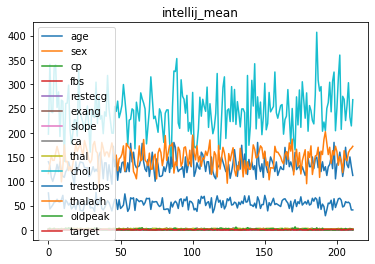

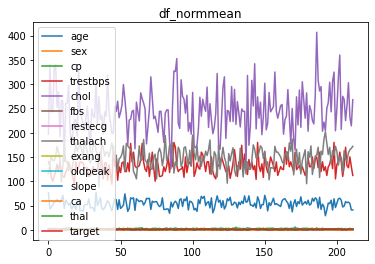

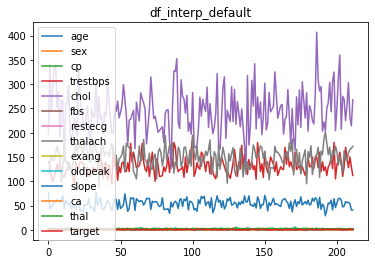

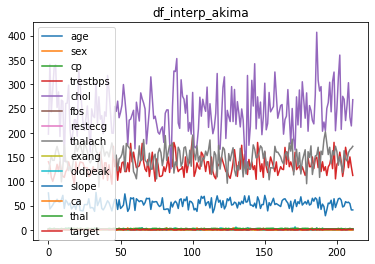

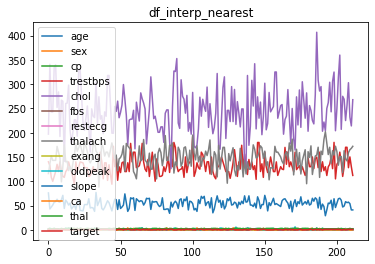

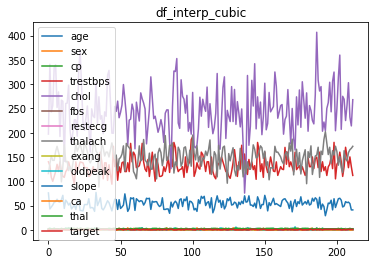

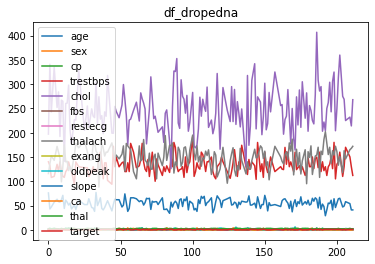

In [24]:
for df_type in df_types:
  print("DF method: {}".format(df_type["name"]))
  df_type["df"].plot(title=df_type["name"])

# Data smoothing


First let's see that if there are anomalies or noise in the data such that is visible even by eye!

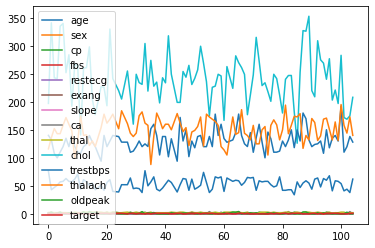

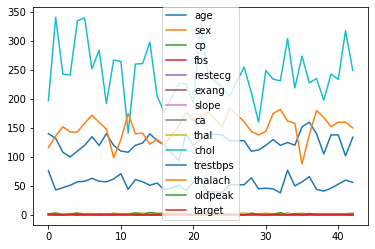

In [25]:
df_intellijm.head(100).plot()
df_intellijm.head(40).plot()

**First consideration**

I believe that data smoothing would not be a good idea here and this is because that the numerical values are not that much different and with smoothing they will become even more alike (less distance from each other) and this will make it harder for the algorithm to distinguish them from each other. However, it may have a positive effect by removing noise when data is not shuffled (which we will do it by applying normalization methods). Therefore, it should be checked with the ML method at the next section.

**Second consideration**

Just like the warning for the "interpolation" section, here again smoothing does not help (because data is not time-series and data position should not have an affect on the value of feature). Therefore, the smoothing methods like moving average is not suitable. 

# Normalization

Data normalization for all the features may not be a good idea (based on the first explanation in the Data smoothing section) but for the ones that have high varience would be good. By looking at the plot of dataset, we can see that "age" feature is one of the features that can be normalized but "sex" is not good because it is binary and does not have high varience. Let's print out the std and the mean of each feature and sort them to find out the features that is best to normalize.

**For the categorical values at the end we will convert them to one-hot (I will explain it at that point) so normalization is not needed for them**

In [26]:
s1 = df_intellijm.std().sort_values(ascending=False)
s2 = df_intellijm.mean().sort_values(ascending=False)

df_concat = pd.DataFrame([s1,s2],index=['STD',"Mean"])
df_concat

,chol,thalach,trestbps,age,oldpeak,ca,cp,slope,thal,restecg,target,exang,sex,fbs
STD,45.667151,21.502124,17.884926,9.148881,1.218176,1.046155,1.020745,0.624738,0.589682,0.535312,0.499686,0.479060,0.463145,0.339708
Mean,244.991973,149.662035,132.014521,54.284314,1.108310,0.730392,0.950980,1.406863,2.352941,0.563725,0.539216,0.352941,0.691176,0.132353


So the best approach is to normalize these features:

chol, thalach, trestbps, age


The other values are not that much significant and normalization may degrade the performance of the ML algorithm.

In [27]:
def normalizer(column, df_to_normalize, zed_score=False):
  if not zed_score:
    max = df_to_normalize[column].max()
    min = df_to_normalize[column].min()
    denominator = max - min 

    normalized_column = df_to_normalize[column].apply(lambda x: (x - min) / denominator)

  else:
    mean_col = df_to_normalize[column].mean()
    std_col = df_to_normalize[column].std() 

    normalized_column = df_to_normalize[column].apply(lambda x: (x - mean_col) / std_col)

  dropped = df_to_normalize.drop(columns=column)
  dropped[column] = normalized_column

  return dropped


## minmax normalize

,sex,cp,fbs,restecg,exang,slope,ca,thal,oldpeak,age,chol,thalach,trestbps,target
0,0,2,0,2.0,0,1.0,0,2.0,1.284822,0.979167,0.252879,0.244681,0.470641,1
1,0,0,1,0.0,1,1.0,0,3.0,3.110483,0.291667,0.765412,0.420115,0.388835,0
2,1,2,0,1.0,0,2.0,0,2.0,-0.023723,0.375000,0.415661,0.562440,0.142289,0
3,1,2,0,1.0,1,1.0,0,2.0,1.195082,0.458333,0.410635,0.482156,0.061073,1
4,1,0,0,1.0,1,1.0,1,3.0,3.082052,0.583333,0.743703,0.482595,0.164763,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,2,1,0.0,1,1.0,1,1.0,0.606726,0.562500,0.463255,0.472797,0.412539,0
208,0,0,0,0.0,0,2.0,1,2.0,0.592119,0.583333,0.629880,0.621877,0.347049,1
209,1,2,0,0.0,0,2.0,0,3.0,1.715230,0.520833,0.377543,0.674333,0.573477,1
210,1,2,0,0.0,0,1.0,0,2.0,1.992138,0.250000,0.313061,0.699519,0.366803,1


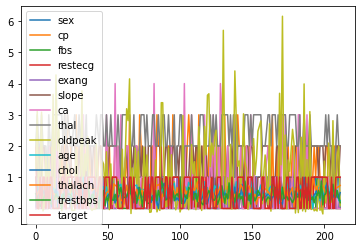

In [28]:
columns_to_normalize = ["age", "chol", "thalach", "trestbps"]

for index, column in enumerate(columns_to_normalize):
  if index == 0:
    dropped = normalizer(column, df_intellijm)
  else:
    dropped = normalizer(column, dropped)

dropped_target = dropped["target"]
tmp = dropped.drop(columns=["target"])
tmp["target"] = dropped_target

normalized_minmax = tmp.copy()
normalized_minmax.plot()
normalized_minmax


## z-score normalize

,sex,cp,fbs,restecg,exang,slope,ca,thal,oldpeak,age,chol,thalach,trestbps,target
0,0,2,0,2.0,0,1.0,0,2.0,1.284822,2.373589,-1.048587,-1.567750,0.452241,1
1,0,0,1,0.0,1,1.0,0,3.0,3.110483,-1.233409,2.103426,-0.636775,0.003639,0
2,1,2,0,1.0,0,2.0,0,2.0,-0.023723,-0.796197,-0.047499,0.118500,-1.348355,0
3,1,2,0,1.0,1,1.0,0,2.0,1.195082,-0.358985,-0.078404,-0.307543,-1.793718,1
4,1,0,0,1.0,1,1.0,1,3.0,3.082052,0.296833,1.969914,-0.305212,-1.225111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,2,1,0.0,1,1.0,1,1.0,0.606726,0.187530,0.245201,-0.357207,0.133624,0
208,0,0,0,0.0,0,2.0,1,2.0,0.592119,0.296833,1.269920,0.433915,-0.225504,1
209,1,2,0,0.0,0,2.0,0,3.0,1.715230,-0.031076,-0.281919,0.712285,1.016164,1
210,1,2,0,0.0,0,1.0,0,2.0,1.992138,-1.452015,-0.678473,0.845938,-0.117178,1


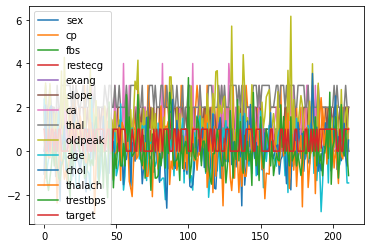

In [29]:
columns_to_normalize = ["age", "chol", "thalach", "trestbps"]

for index, column in enumerate(columns_to_normalize):
  if index == 0:
    dropped = normalizer(column, df_intellijm, zed_score=True)
  else:
    dropped = normalizer(column, dropped, zed_score=True)

dropped_target = dropped["target"]
tmp = dropped.drop(columns=["target"])
tmp["target"] = dropped_target

normalized_zscore = tmp.copy()
normalized_zscore.plot()
normalized_zscore

## The evaluator based on the best parameters for KNN (from part 2 of the assignment)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


def eval_preproc(data, heart_ds=True, normalization=False):
  if heart_ds:
    data_target = data["target"]
    data_target = data_target.to_numpy()
    data_features = data.drop('target', axis=1)
    data_features = data_features.to_numpy()
  else:
    return  

  if normalization:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(data_features)
    data_features = scaler.transform(data_features)


  KNN = KNeighborsClassifier(n_neighbors=5)
  scores = cross_val_score(KNN, data_features, data_target, cv=5, scoring='accuracy')
  accuracy = scores.mean()
  return accuracy


# Evaluating Normalization Methods



In [31]:
normalized_dfs = [normalized_minmax, normalized_zscore, df_intellijm]

for index, df_normals in enumerate(normalized_dfs):

  if index == 0:
    norm_method = "customized features minmax"
  elif index == 1:
    norm_method = "customized features zscore"
  elif index == 2:
    norm_method = None

  if norm_method:
    print("The normalization method is: \n{}".format(norm_method))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals))
    print("\n")
  else:
    print("The normalization method is: \n{}".format("Nothing!"))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals))
    print("\n")

    print("The normalization method is: \n{}".format("Simple MinMax"))
    print("Accuracy for the KNN with best parameters is:")
    print(eval_preproc(df_normals, normalization=True))

The normalization method is: 
customized features minmax
Accuracy for the KNN with best parameters is:
0.8239024390243903


The normalization method is: 
customized features zscore
Accuracy for the KNN with best parameters is:
0.8137804878048781


The normalization method is: 
Nothing!
Accuracy for the KNN with best parameters is:
0.6176829268292684


The normalization method is: 
Simple MinMax
Accuracy for the KNN with best parameters is:
0.8237804878048781


## Best normalization

As can be seen the normalizaiton has a considerable effect on the accuracy of the KNN classifier. Without normalization we have ~ 62% accruacy but with normalization we can achieve up to ~82% accuracy. The "customized features minmax" normalized method beside the "Simple MinMax" are the best methods. This means that normalizing all features would also help the model and no information will be lost.

## Evaluating the filling methods for the missed values (without normalization)

In [32]:
for df_type in df_types:
  print("The filling method is: \n{}".format(df_type["name"]))
  print("Accuracy for the KNN with best parameters is:")
  print(eval_preproc(df_type["df"]))
  print("\n")

The filling method is: 
intellij_mean
Accuracy for the KNN with best parameters is:
0.6176829268292684


The filling method is: 
df_normmean
Accuracy for the KNN with best parameters is:
0.5882926829268293


The filling method is: 
df_interp_default
Accuracy for the KNN with best parameters is:
0.5935365853658536


The filling method is: 
df_interp_akima
Accuracy for the KNN with best parameters is:
0.5935365853658536


The filling method is: 
df_interp_nearest
Accuracy for the KNN with best parameters is:
0.5835365853658537


The filling method is: 
df_interp_cubic
Accuracy for the KNN with best parameters is:
0.6178048780487806


The filling method is: 
df_dropedna
Accuracy for the KNN with best parameters is:
0.620672268907563




As expected the interpolation methods (on average) and normal mean are not very good. However the "intellij_mean" performs as good as the "cubic" interpolation (which is a heavy interpolation method) and are very close to "dropedna" meaning that dropping all the missed values would result in best performance.

# Investigating whether onehot encoding will improve the accuracy or not

It is a good practice that the categorical values are converted to onehot encoding so that the classifier doesn't treat them the same as numerical values. This will achieve better performance in general but we should test it to confirm. 

The categorical values to be onehot encoded are:
cp, restecg, slope, thal

In [33]:
df_dropedna_onehot = pd.get_dummies(normalized_minmax.dropna(), columns=["cp","restecg","slope","thal"], prefix=["cp","restecg","slope","thal"])
df_dropedna_onehot

,sex,fbs,exang,ca,oldpeak,age,chol,thalach,trestbps,target,cp_0,cp_1,cp_2,cp_3,restecg_0.0,restecg_1.0,restecg_2.0,slope_0.0,slope_1.0,slope_2.0,thal_1.0,thal_2.0,thal_3.0
0,0,0,0,0,1.284822,0.979167,0.252879,0.244681,0.470641,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0,1,1,0,3.110483,0.291667,0.765412,0.420115,0.388835,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,-0.023723,0.375000,0.415661,0.562440,0.142289,0,0,0,1,0,0,1,0,0,0,1,0,1,0
3,1,0,1,0,1.195082,0.458333,0.410635,0.482156,0.061073,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,1,0,1,1,3.082052,0.583333,0.743703,0.482595,0.164763,0,1,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,1,1,1,0.606726,0.562500,0.463255,0.472797,0.412539,0,0,0,1,0,1,0,0,0,1,0,1,0,0
208,0,0,0,1,0.592119,0.583333,0.629880,0.621877,0.347049,1,1,0,0,0,1,0,0,0,0,1,0,1,0
209,1,0,0,0,1.715230,0.520833,0.377543,0.674333,0.573477,1,0,0,1,0,1,0,0,0,0,1,0,0,1
210,1,0,0,0,1.992138,0.250000,0.313061,0.699519,0.366803,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [34]:
print("Using onehot encoding for categorical features on the \"df_dropedna_onehot\" data")
print("Accuracy for the KNN with best parameters is:")
print(eval_preproc(df_dropedna_onehot, normalization=False))
print("\n")

print("NOT Using onehot encoding for categorical features on the \"df_dropedna\" data")
print("Accuracy for the KNN with best parameters is:")
print(eval_preproc(df_dropedna, normalization=True))
print("\n")

Using onehot encoding for categorical features on the "df_dropedna_onehot" data
Accuracy for the KNN with best parameters is:
0.8436585365853657


NOT Using onehot encoding for categorical features on the "df_dropedna" data
Accuracy for the KNN with best parameters is:
0.8163025210084035




So, onehot encoding will help here considerably.

# CM2 "Heart disease" dataset

# Pair plotting

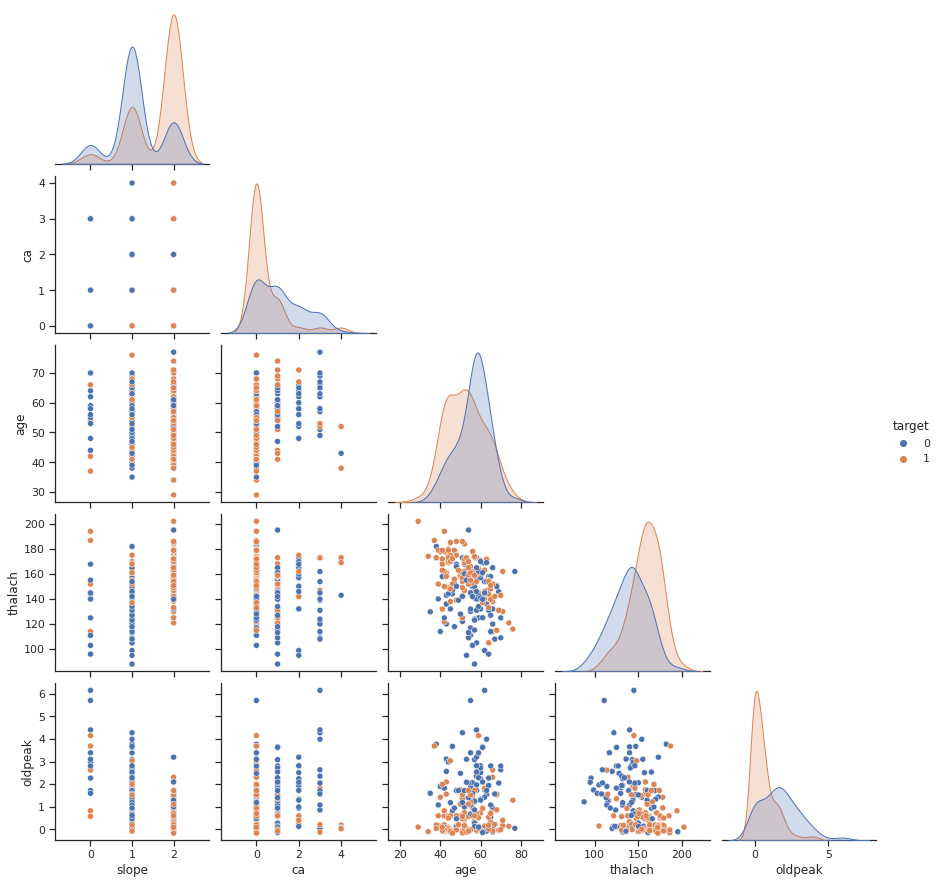

In [35]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_intellijm, hue="target", vars=list(str("slope,ca,age,thalach,oldpeak").split(",")) , corner=True)


import matplotlib.pyplot as plt

plt.show()

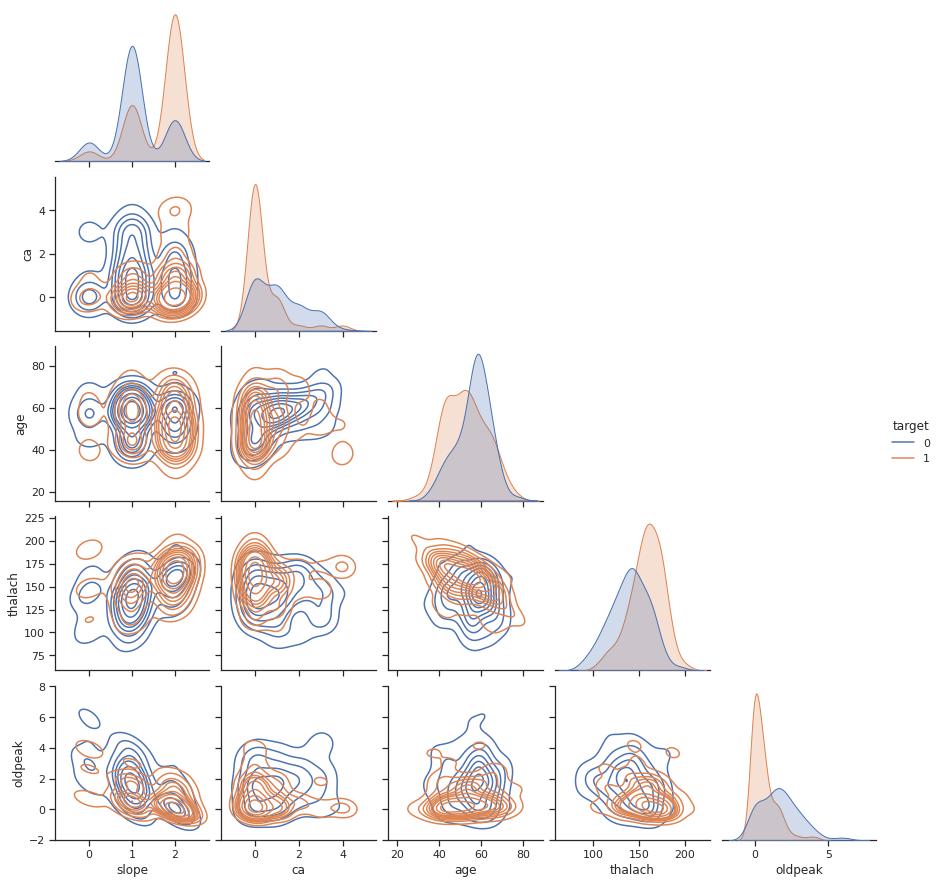

In [36]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_intellijm, hue="target", vars=list(str("slope,ca,age,thalach,oldpeak").split(",")) , corner=True, kind="kde")


import matplotlib.pyplot as plt

plt.show()

The reasoning to choose "age,thalach,oldpeak" is that they make sense that they would be correlated to each other intuitively. Moreover, "slope, ca" which are categorical are harder to guess which I found by viewing their "pair plotting".

To be checked in the next question by calculating the correlation coefficients. 

# CM3 "Heart disease" dataset

In [37]:
df_intellijm.corr(method="spearman")

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,chol,trestbps,thalach,oldpeak,target
age,1.000000,-0.112140,-0.114821,0.056042,-0.150932,0.107369,-0.138985,0.323569,0.062434,0.149751,0.315080,-0.381365,0.151409,-0.212975
sex,-0.112140,1.000000,-0.033858,0.073210,-0.035112,0.116235,-0.042101,0.136876,0.259224,-0.157922,-0.042881,-0.019729,0.114504,-0.256056
cp,-0.114821,-0.033858,1.000000,0.064466,0.054504,-0.369662,0.192805,-0.235318,-0.223602,-0.045916,-0.032446,0.313269,-0.211738,0.519791
fbs,0.056042,0.073210,0.064466,1.000000,-0.112213,0.105054,-0.014006,0.147855,0.026673,-0.004790,0.153403,0.018791,-0.077502,-0.016217
restecg,-0.150932,-0.035112,0.054504,-0.112213,1.000000,-0.036940,0.093835,-0.106425,-0.028581,-0.118987,-0.121779,0.072573,-0.079922,0.105385
exang,0.107369,0.116235,-0.369662,0.105054,-0.036940,1.000000,-0.322889,0.149543,0.224605,0.085352,0.067933,-0.370493,0.266864,-0.449099
slope,-0.138985,-0.042101,0.192805,-0.014006,0.093835,-0.322889,1.000000,-0.102217,-0.230144,0.033884,-0.115120,0.510139,-0.617563,0.439136
ca,0.323569,0.136876,-0.235318,0.147855,-0.106425,0.149543,-0.102217,1.000000,0.197541,0.063445,0.046104,-0.218872,0.183787,-0.388289
thal,0.062434,0.259224,-0.223602,0.026673,-0.028581,0.224605,-0.230144,0.197541,1.000000,-0.006312,0.051457,-0.165518,0.273125,-0.437468
chol,0.149751,-0.157922,-0.045916,-0.004790,-0.118987,0.085352,0.033884,0.063445,-0.006312,1.000000,0.099302,-0.046347,0.028265,-0.091181


**Correlation with label (target) value**

**What to drop**


First of all, the features that have very low correlation with "target" can be likely dropped. For example, "fbs" has 0.01 correlation with "target" means that the "fbs" wouldn't add much info for predicting "target". Hence, it can be removed without hurting the model's accuracy much.


**What is the most important to keep**

The higher the feature has correlation with the "target" the more important the feature is for classifying. If we set a threshold of abs(0.45) for the correlation coefficients, we can see that "cp", "exang", "oldpeak" have more or around abs(0.45) correlation with "target". These features are the most important for "target".

**What may be dropped and not loosing much info**

Now if we can find high correlations between these features and other features, we can simply remove the other correlated features. Because they are predictable by the selected "cp", "exang", "oldpeak" features and are not adding much new info to the model.

We set threshold here at abs(0.6). it is higher than the abs(0.45) because we want to ensure that information is kept as much as possible by removing the correlating features. For "oldpeak" it can be seen that "slope" has high correlation with it. However, "slope" itself also hase a great correlation with "target" which makes sense.


**Decide for the KNN model, what to keep, what to drop**


Here the dataset is considerably small (around 200 datapoints). In addition, the number of features is also not that much. Lastly, the model itself is not that heavy for this number of datapoints and features (KNN). Therefore it doesn't hurt anyone to keep all the features untouched! by removing the possible candidate (stated above) we gain a little performance boost from timing side (not much) but may loose (again not much because we had several statstical methods to confirm) information. So, we will keep it for the KNN model (we explain that in CM4 the overall accuracy of the model is better by keeping these columns this means that they indeed help by a little).

-----------------------------------

**Correlation of features with each other**

There are several intresting features that are correlated in an impressive amount.

For example, "age" has a relatively good amount of positive correlation with "ca", "trestbps". Aditionally, it has a great negative correlation with "thalach". 

Another example from categorical features would be "cp" that has a relatively good amount of positive correlation with "thalach". Aditionally, it has a great negative correlation with "exang". 

Another example from categorical features would be "slope" that has a relatively good amount of positive correlation with "thalach". Aditionally, it has a great negative correlation with "oldpeak".

On average "thalach" has the highest correlation with other features which makes this feature important. Also, it means that it can be interpolated (for missed values) based on the high correlating feature that has data (eg. age).

All in all, there are some correlations in the dataset between features which makes totally sense based on the data (like "age" and "thalach"). However, none of them are perfectly correlated. The highest correlation is around ~0.6 (a little more than half of perfect correlation).

In [39]:
pd.DataFrame(data=[df_intellijm.mean(), df_intellijm.var(), df_intellijm.skew(), df_intellijm.kurtosis()], index=["Mean","Var","Skew","Kurtosis"], columns = df_intellijm.columns).drop(columns=["target"])

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,chol,trestbps,thalach,oldpeak
Mean,54.284314,0.691176,0.950980,0.132353,0.563725,0.352941,1.406863,0.730392,2.352941,244.991973,132.014521,149.662035,1.108310
Var,83.702019,0.214503,1.041920,0.115401,0.286559,0.229499,0.390297,1.094441,0.347725,2085.488690,319.870566,462.341346,1.483952
Skew,-0.111658,-0.833732,0.463692,2.185921,0.132194,0.620026,-0.560001,1.393436,-0.284093,0.311914,0.689909,-0.397944,1.269142
Kurtosis,-0.528544,-1.317909,-1.248299,2.805662,-1.173248,-1.631662,-0.600524,1.042355,-0.669427,0.397386,0.672262,-0.145238,1.642954


By looking at their plot of data (a little above) we can see that many of the features have a normal distribution alike form which means that the sampling of data is pretty good and informative (eg. age).

The "mean" and "var" realtions were disscussed in the normalized section. One method also for dropping features is by looking at the variance of them: 

**Variance method**

"The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods." source: https://ranasinghiitkgp.medium.com/implementing-feature-selection-methods-for-machine-learning-bfa2e4b4e02

Therefore here the variance threshold indicates that "fbs" can be removed (like the correlation coefficients conclusion that we got earlier).

The categorical features have high skew which is normal (because they are categorical and have jumps in values! also for binary values this holds too!). 

The intresting fact thing is that "oldpeak" has a high skew and kurtosis values (also visible above in the plot for oldpeak). This facts indicates that this feature could be very important for KNN to be able to classify the "target" (which was also inline with the correlation coefficients).



**Decide for the KNN model, what to keep, what to drop**


Here the dataset is considerably small (around 200 datapoints). In addition, the number of features is also not that much. Lastly, the model itself is not that heavy for this number of datapoints and features (KNN). Therefore it doesn't hurt anyone to keep all the features untouched! by removing the possible candidate (stated above) we gain a little performance boost from timing side (not much) but may loose (again not much because we had several statstical methods to confirm) information. So, we will keep it for the KNN model (we explain that in CM4 the overall accuracy of the model is better by keeping these columns this means that they indeed help by a little).

# CM4 "Heart disease" dataset

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [41]:
# Reading data + simple preprocessing
heart_data = pd.read_csv('heart_disease_missing.csv')
heart_data = heart_data.dropna()

target_heart = heart_data["target"]
target_heart = target_heart.to_numpy()
df_dropedna_onehot_knn = pd.get_dummies(heart_data, columns=["cp","restecg","thal","slope"], prefix=["cp","restecg","thal","slope"])
features_heart = df_dropedna_onehot_knn.drop('target', axis=1)

features_heart = features_heart.to_numpy()

scaler = MinMaxScaler()
scaler.fit(features_heart)
features_heart = scaler.transform(features_heart)

# Question 2, Step 1
# train_test split

x_train, x_test, y_train, y_test = train_test_split(features_heart, target_heart, test_size=0.2, random_state=98)

# Question 2, Step 2
# train KNN with default parameters

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("acuuracy of the KNN classifier with default parameters:  %s"%accuracy)

acuuracy of the KNN classifier with default parameters:  0.7714285714285715


As you can see in the above, after spliting the data to 80% for training and 20% for testing, we first fited the
model with defaults parameters of the KNN classifier on the training data (for heart_desease), and reached 0.77
accuracy on the test data.

(We would reach a better accuracy (0.82) with default parameters of KNN if we had removed these columns from the dataset: "fbs", "chol", "trestbps", "slope". As they have a low correlation with the target. However, in overall performance after fine-tuning, we would get a better result if we keep those columns too. 


# CM5 "Heart disease" dataset

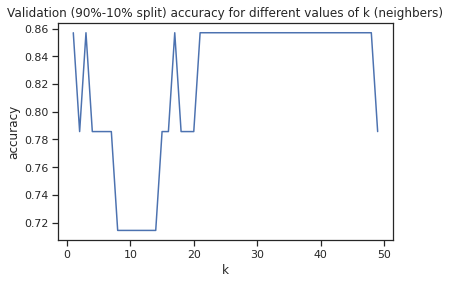

best k based on the validation accuracy (90-10 split): 1


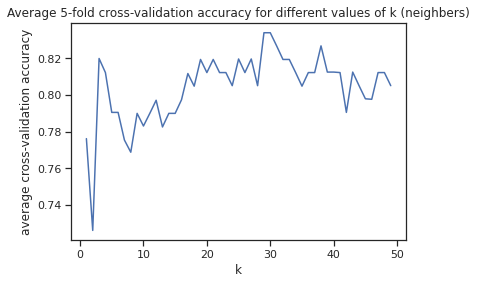

best k based on the validation accuracy (5-fold): 30


In [42]:
# Question 2, Step 3
# Observing the effect of k (number of neighbors) with 90%-10% split for validation

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=98)

K = np.arange(1,50)

recorded_accur = []

for k in K:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, Y_train)
  y_pred = KNN.predict(X_valid)
  accuracy = accuracy_score(Y_valid, y_pred)
  recorded_accur.append(accuracy)

recorded_accur = np.array(recorded_accur)

plt.figure()
plt.plot(K, recorded_accur)
plt.title("Validation (90%-10% split) accuracy for different values of k (neighbers)")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

k_best = np.argmax(recorded_accur) + 1
print("best k based on the validation accuracy (90-10 split): %s"%k_best)

# Analyzing effect of k with cross-validation

recorded_accur = []

for k in K:
  KNN = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(KNN, x_train, y_train, cv=5, scoring='accuracy')
  accuracy = scores.mean()
  recorded_accur.append(accuracy)

recorded_accur = np.array(recorded_accur)

plt.figure()
plt.plot(K, recorded_accur)
plt.title("Average 5-fold cross-validation accuracy for different values of k (neighbers)")
plt.xlabel("k")
plt.ylabel("average cross-validation accuracy")
plt.show()

k_best = np.argmax(recorded_accur) + 1
print("best k based on the validation accuracy (5-fold): %s"%k_best)

Then, after further splitting the training data to 90%-10% for training and validation, we changed the k (number of neighbors) from 1 to 50, and plot the validation accuracy for these values of k. From the figure, we can see k=1 had the best validation score for 90%-10% splitting for validation.

However, 10% of the training data is about 20 samples, which is very small and the validation scores obtained are to some extent arbirary, and by rerunning the code (without random_state=98), we would get a very different result, and our figure (validation accuracy versus different values of k) would look very different each time. Therefore, we repeat the same task this time with 5-fold cross-validation, and plot another average validation scores in the second figure above. In this figure, we can see that the value of k doesn't have significant effect on performance in this range(1:50), but generally values of k between 25 to 35 have a better perfromannce relatively. (the best k for 5-fold validation is 30)

# CM6 "Heart disease" dataset

In [43]:
# Calculating performance on test data for the best k

KNN = KNeighborsClassifier(n_neighbors=k_best)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy for the best value of k (%s):  %s"%(k_best, accuracy))
f1score = f1_score(y_test, y_pred)
print("Test F1-score for the best value of k (%s):  %s"%(k_best, f1score))
AUC = roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])
print("Test AUC score for the best value of k (%s):  %s"%(k_best, AUC))

Test accuracy for the best value of k (30):  0.8857142857142857
Test F1-score for the best value of k (30):  0.9
Test AUC score for the best value of k (30):  0.8933333333333333


At last, we trained a model with the best obtained k (3) from cross-validation on the whole train data, and obtained accuracy =0.886, F1-score=0.9, AUC_score = 0.89 on the test data.

# CM7 "Heart disease" dataset

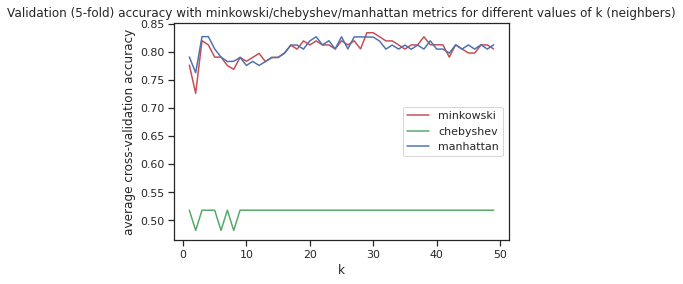

best found parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Test accuracy for the best parameters:  0.8
Test F1-score for the best parameters:  0.8292682926829269
Test AUC score for the best parameters:  0.8616666666666668


In [44]:
# Analyzing the effect of distance metric
K = np.arange(1,50)
accuracy_minkowski = []
accuracy_chebyshev = []
accuracy_manhattan = []

for k in K:
  KNN_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  scores = cross_val_score(KNN_minkowski, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_minkowski.append(scores.mean())

  KNN_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  scores = cross_val_score(KNN_chebyshev, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_chebyshev.append(scores.mean())

  KNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  scores = cross_val_score(KNN_manhattan, x_train, y_train, cv=5, scoring='accuracy')
  accuracy_manhattan.append(scores.mean())

plt.figure()
plt.plot(K, accuracy_minkowski, 'r')
plt.plot(K, accuracy_chebyshev, 'g')
plt.plot(K, accuracy_manhattan, 'b')
plt.legend(["minkowski", "chebyshev", "manhattan"])
plt.title("Validation (5-fold) accuracy with minkowski/chebyshev/manhattan metrics for different values of k (neighbers)")
plt.xlabel("k")
plt.ylabel("average cross-validation accuracy")
plt.show()


# Finding the best parameters with exhaustive grid search


K = np.arange(1,50)
Weights = ['uniform', 'distance']
Algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
P = [2, 3]
Metric = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
parameters = {'n_neighbors':K, 'weights':Weights, 'algorithm':Algorithms, 'p':P, 'metric':Metric}

KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters,cv=5)
clf.fit(x_train, y_train)
print("best found parameters: %s"%clf.best_params_)

KNN = clf.best_estimator_
# Calculating performance on test data for the best found parameters
y_pred = KNN.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy for the best parameters:  %s"%accuracy)
f1score = f1_score(y_test, y_pred)
print("Test F1-score for the best parameters:  %s"%f1score)
AUC = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("Test AUC score for the best parameters:  %s"%AUC)
#******************
#******************
#******************
#******************
#******************
#******************
#******************

In this part, again using 5-fold cross-validation, we ploted the average validation score fot k in (1,50) for 3 different distance metrics: minkowski, chebyshev, and manhattan (for the heart desease dataset).

We can see from the above figure that for heart desease dataset, 'manhattan' distance metrics has the best performace among the 3, and 'chebyshev' metric has very poor performance for this dataset.

Then, using exhastive grid search, we evaluate (5-fold cross validation) KNN models with different values of k, algorithms used, p, distance merics, and weights. We have reported the best obtained parameters, and training the KNN with best obtained parameters resulted in accuracy =0.8, F1-score=0.829, AUC_score = 0.86 on the test data. This is still better than the default parameters, but becasue the number of samples are small, by validation score we couldn't get a better result by dine-tuning all the parameters compared to just fine-tuning k.




